<a href="https://colab.research.google.com/github/Danieljoshua720/Electricity-demand-forecasting-AIML/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam


In [2]:
df=pd.read_csv('/content/powerdemand_5min_2021_to_2024_with weather.csv')

In [3]:
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [4]:
df.tail()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
393435,393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,2174.893333
393436,393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,2139.416667
393437,393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,2115.423333
393438,393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,2086.200000
393439,393439,2024-12-12 00:30:00,2049.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,30,2063.866667


In [5]:

df.isnull()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
393436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
393437,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
393438,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df=df.dropna()

In [7]:
df.drop_duplicates()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000
5,5,2021-01-01 00:55:00,1925.21,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,55,1952.006667
6,6,2021-01-01 01:00:00,1907.98,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,0,1929.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,2174.893333
393436,393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,2139.416667
393437,393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,2115.423333
393438,393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,2086.200000


In [8]:
df = df.drop(columns=['Unnamed: 0'])


In [9]:

num_cols = ['wdir', 'pres', 'year', 'month', 'day', 'hour', 'minute', 'moving_avg_3']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])


In [11]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392898 entries, 2 to 393439
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime      392898 non-null  datetime64[ns]
 1   Power demand  392898 non-null  float64       
 2   temp          392898 non-null  float64       
 3   dwpt          392898 non-null  float64       
 4   rhum          392898 non-null  float64       
 5   wdir          392898 non-null  float64       
 6   wspd          392898 non-null  float64       
 7   pres          392898 non-null  float64       
 8   year          392898 non-null  int32         
 9   month         392898 non-null  int32         
 10  day           392898 non-null  int32         
 11  hour          392898 non-null  int32         
 12  minute        392898 non-null  int32         
 13  moving_avg_3  392898 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int32(5)
memory usage: 37.5 MB


In [13]:
X = df.drop(columns=['datetime', 'Power demand'])
y = df[['Power demand']]


In [14]:
train_size = int(0.8 * len(df))
val_size   = int(0.1 * len(df))

X_train = X[:train_size]
X_val   = X[train_size:train_size + val_size]
X_test  = X[train_size + val_size:]

y_train = y[:train_size]
y_val   = y[train_size:train_size + val_size]
y_test  = y[train_size + val_size:]

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled   = scaler_X.transform(X_val)
X_test_scaled  = scaler_X.transform(X_test)


In [16]:
scaler_y = MinMaxScaler(feature_range=(0, 1))

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled   = scaler_y.transform(y_val)
y_test_scaled  = scaler_y.transform(y_test)


In [17]:
print(y_train_scaled.shape)


(314318, 1)


In [18]:
def create_sequences(X, y, n_past):
    Xs, ys = [], []
    for i in range(n_past, len(X)):
        Xs.append(X[i-n_past:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)


In [19]:
n_past = 24  # example (24 hours / timesteps)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, n_past)
X_val_seq,   y_val_seq   = create_sequences(X_val_scaled,   y_val_scaled,   n_past)
X_test_seq,  y_test_seq  = create_sequences(X_test_scaled,  y_test_scaled,  n_past)


In [20]:
def stacked_gru(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(64),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    return model


In [21]:
def vanilla_gru(input_shape):
    model = Sequential([
        GRU(64, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    return model


In [22]:
def bidirectional_gru(input_shape):
    model = Sequential([
        Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
        GRU(32),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    return model


In [23]:
def deep_gru(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(64, return_sequences=True),
        Dropout(0.3),
        GRU(32),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.0005), loss='mse')
    return model


In [24]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=10):
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=512,
        verbose=1
    )
    return history


In [25]:
def evaluate_model(model, X_test, y_test, scaler_y):
    y_pred_scaled = model.predict(X_test)

    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    return rmse, mae, r2


In [26]:
models = {
    "Vanilla GRU": vanilla_gru,
    "Stacked GRU": stacked_gru,
    "Bidirectional GRU": bidirectional_gru,
    "Deep GRU": deep_gru
}

results = {}

for name, builder in models.items():
    print(f"\n🚀 Training {name}")
    tf.keras.backend.clear_session()

    model = builder(
        input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])
    )

    train_model(model, X_train_seq, y_train_seq, X_val_seq, y_val_seq)

    rmse, mae, r2 = evaluate_model(model, X_test_seq, y_test_seq, scaler_y)

    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }



🚀 Training Vanilla GRU


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0047 - val_loss: 3.5268e-04
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.2578e-04 - val_loss: 3.1216e-04
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9987e-04 - val_loss: 2.8310e-04
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.8976e-04 - val_loss: 2.8862e-04
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7722e-04 - val_loss: 2.4610e-04
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.5172e-04 - val_loss: 2.5195e-04
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.6897e-04 - val_loss: 2.5789e-04
Epoch 8/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.6581e-04 - val_loss: 2.2391e-04
Epoch 9/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.4970e-04 - val_loss: 2.0847e-04
Epoch 10/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.3940e-04 - val_loss: 1.9629e-04
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

🚀 Training Stacked 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0077 - val_loss: 5.8453e-04
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 4.9516e-04 - val_loss: 5.0188e-04
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3.8709e-04 - val_loss: 3.7361e-04
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 3.2289e-04 - val_loss: 3.8271e-04
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2.8735e-04 - val_loss: 5.5456e-04
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 2.2186e-04 - val_loss: 2.7138e-04
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2.1952e-04 - val_loss: 4.5419e-04
Epoch 8/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.9687e-04 - val_loss: 3.5858e-04
Epoch 9/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.8741e-04 - val_loss: 3.0058e-04
Epoch 10/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.7889e-04 - val_loss: 2.3254e-04
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

🚀 Training Bi

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0130 - val_loss: 4.2285e-04
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2.8009e-04 - val_loss: 3.1112e-04
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 2.0961e-04 - val_loss: 2.7691e-04
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.8055e-04 - val_loss: 2.5345e-04
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.8656e-04 - val_loss: 2.7621e-04
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.7003e-04 - val_loss: 2.3660e-04
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.5412e-04 - val_loss: 2.1706e-04
Epoch 8/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.5031e-04 - val_loss: 2.0531e-04
Epoch 9/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.3848e-04 - val_loss: 1.9685e-04
Epoch 10/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.4621e-04 - val_loss: 2.8588e-04
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

🚀 Training D

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0093 - val_loss: 0.0010
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 9.8528e-04 - val_loss: 7.7545e-04
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 6.3557e-04 - val_loss: 0.0014
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 5.4968e-04 - val_loss: 0.0011
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 4.6153e-04 - val_loss: 0.0012
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 4.0828e-04 - val_loss: 0.0013
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 3.7496e-04 - val_loss: 0.0010
Epoch 8/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 3.3307e-04 - val_loss: 8.2642e-04
Epoch 9/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 2.9234e-04 - val_loss: 5.1332e-04
Epoch 10/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 2.7074e-04 - val_loss: 9.0563e-04
1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [27]:
results_df = pd.DataFrame(results).T
print(results_df)


                         RMSE        MAE        R2
Vanilla GRU         75.543917  30.710833  0.996184
Stacked GRU         78.562421  38.217911  0.995873
Bidirectional GRU   92.319375  61.517234  0.994301
Deep GRU           121.983405  70.069084  0.990051


In [28]:
results_df.to_csv("gru_results.csv")


In [29]:
param_grid = {
    "units": [64, 128],          # remove 32
    "dropout": [0.0, 0.2],       # remove 0.3
    "learning_rate": [0.001],    # remove 0.0005
    "batch_size": [64],          # single batch
}


In [30]:
def build_gru_hp(input_shape, units, dropout, lr):
    model = Sequential([
        GRU(units, return_sequences=False, input_shape=input_shape),
        Dropout(dropout),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="mse"
    )
    return model


In [31]:
results = []

for units in param_grid["units"]:
    for dropout in param_grid["dropout"]:
        for lr in param_grid["learning_rate"]:
            for batch_size in param_grid["batch_size"]:

                print(f"\n🚀 units={units}, dropout={dropout}, lr={lr}, batch={batch_size}")

                tf.keras.backend.clear_session()

                model = build_gru_hp(
                    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                    units=units,
                    dropout=dropout,
                    lr=lr
                )

                model.fit(
                    X_train_seq, y_train_seq,
                    validation_data=(X_val_seq, y_val_seq),
                    epochs=20,
                    batch_size=batch_size,
                    verbose=0
                )

                val_pred = model.predict(X_val_seq)

                val_pred = scaler_y.inverse_transform(val_pred)
                val_true = scaler_y.inverse_transform(y_val_seq)

                rmse = np.sqrt(mean_squared_error(val_true, val_pred))

                results.append({
                    "units": units,
                    "dropout": dropout,
                    "lr": lr,
                    "batch_size": batch_size,
                    "val_RMSE": rmse
                })



🚀 units=64, dropout=0.0, lr=0.001, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1228/1228 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

🚀 units=64, dropout=0.2, lr=0.001, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1228/1228 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

🚀 units=128, dropout=0.0, lr=0.001, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1228/1228 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

🚀 units=128, dropout=0.2, lr=0.001, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1228/1228 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [32]:
grid_results = pd.DataFrame(results)
best_grid = grid_results.sort_values("val_RMSE").iloc[0]

print(best_grid)


units         128.000000
dropout         0.000000
lr              0.001000
batch_size     64.000000
val_RMSE       84.441509
Name: 2, dtype: float64


In [33]:
!pip install keras-tuner


In [34]:
import keras_tuner as kt


In [35]:
def gru_bayesian_model(hp):

    units = hp.Int("units", min_value=32, max_value=128, step=32)
    dropout = hp.Float("dropout", 0.0, 0.4, step=0.1)
    lr = hp.Choice("lr", [1e-3, 5e-4, 1e-4])

    model = Sequential([
        GRU(units, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(dropout),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="mse"
    )

    return model


In [36]:
tuner = kt.BayesianOptimization(
    gru_bayesian_model,
    objective="val_loss",
    max_trials=15,
    directory="gru_tuning",
    project_name="bayesian_gru"
)


Reloading Tuner from gru_tuning/bayesian_gru/tuner0.json


In [37]:
tuner.search(
    X_train_seq,
    y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=20,
    batch_size=64,
    verbose=1
)


In [38]:
best_model = tuner.get_best_models(num_models=1)[0]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [39]:
y_test_pred_scaled = best_model.predict(X_test_seq)

y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_true = scaler_y.inverse_transform(y_test_seq)

rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
mae  = mean_absolute_error(y_test_true, y_test_pred)
r2   = r2_score(y_test_true, y_test_pred)

print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


1228/1228 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
RMSE: 1372.5344011658065
MAE : 1366.8881441635187
R2  : -0.2596050973988675


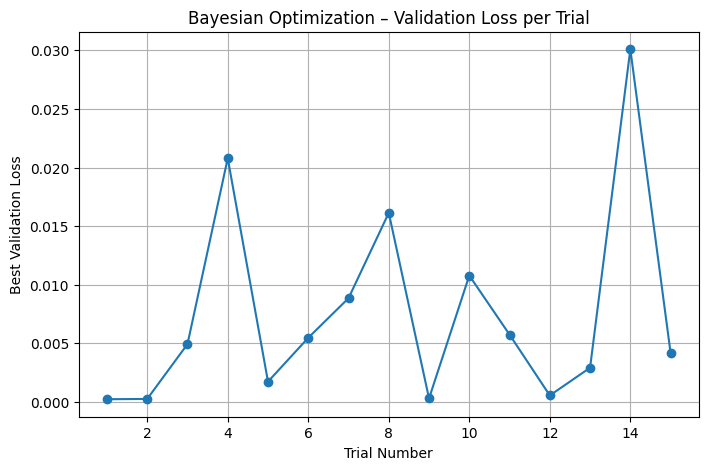

In [42]:
import matplotlib.pyplot as plt

trials = tuner.oracle.trials
trial_ids = list(trials.keys())

val_losses = [
    trials[t].metrics.get_best_value("val_loss")
    for t in trial_ids
]

plt.figure(figsize=(8,5))
plt.plot(range(1, len(val_losses)+1), val_losses, marker='o')
plt.xlabel("Trial Number")
plt.ylabel("Best Validation Loss")
plt.title("Bayesian Optimization – Validation Loss per Trial")
plt.grid(True)
plt.show()


In [43]:
best_hp = tuner.get_best_hyperparameters(1)[0]

for param in best_hp.values:
    print(f"{param}: {best_hp.get(param)}")


units: 64
dropout: 0.30000000000000004
lr: 0.0005


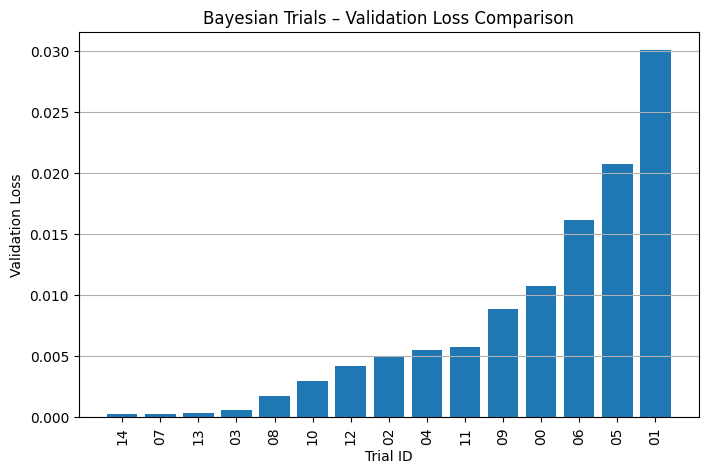

In [44]:
import pandas as pd

trial_data = []

for t in trial_ids:
    trial = trials[t]
    trial_data.append({
        "trial": t,
        "val_loss": trial.metrics.get_best_value("val_loss")
    })

trial_df = pd.DataFrame(trial_data).sort_values("val_loss")

plt.figure(figsize=(8,5))
plt.bar(trial_df["trial"], trial_df["val_loss"])
plt.xticks(rotation=90)
plt.xlabel("Trial ID")
plt.ylabel("Validation Loss")
plt.title("Bayesian Trials – Validation Loss Comparison")
plt.grid(axis="y")
plt.show()


In [47]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df


,units,dropout,lr,batch_size,val_RMSE
0,64,0.0,0.001,64,84.550233
1,64,0.2,0.001,64,89.072127
2,128,0.0,0.001,64,84.441509
3,128,0.2,0.001,64,86.987911


In [48]:
results_sorted = results_df.sort_values("val_RMSE")
results_sorted.head()


,units,dropout,lr,batch_size,val_RMSE
2,128,0.0,0.001,64,84.441509
0,64,0.0,0.001,64,84.550233
3,128,0.2,0.001,64,86.987911
1,64,0.2,0.001,64,89.072127
